### Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Описание датасета

In [3]:
data = pd.read_csv('cookie_cats.csv')

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
data.shape

(90189, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


#### Проверка на пропуски

In [6]:
data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Пропусков данных нет.

#### Проверка на дубликаты

In [7]:
data[data.duplicated('userid') == True]

,userid,version,sum_gamerounds,retention_1,retention_7


Дубликатов по id нет.

#### Проверка корректности сплитования

In [8]:
data_groups = data.groupby('userid', as_index=False).agg({'version': pd.Series.nunique})
data_groups[data_groups['version'] > 1]

,userid,version


Ни один юзер не попал сразу и в контроль, и в тест.

In [9]:
print(f'Размер выборки для контрольной группы: {data[data["version"] == "gate_30"].shape[0]}')
print(f'Размер выборки для тестовой группы: {data[data["version"] == "gate_40"].shape[0]}')

Размер выборки для контрольной группы: 44700
Размер выборки для тестовой группы: 45489


Все юзеры корректно распределены по 2 группам.

# Разведочный анализ

In [10]:
import matplotlib.pyplot as plt

In [11]:
control_all = data[data['version'] == 'gate_30'].shape[0]
test_all = data[data['version'] == 'gate_40'].shape[0]

control_retention1_converted = data[(data['version'] == 'gate_30') & (data['retention_1'] == True)].shape[0]
test_retention1_converted = data[(data['version'] == 'gate_40') & (data['retention_1'] == True)].shape[0]

control_retention7_converted = data[(data['version'] == 'gate_30') & (data['retention_7'] == True)].shape[0]
test_retention7_converted = data[(data['version'] == 'gate_40') & (data['retention_7'] == True)].shape[0]

### Контроль

In [12]:
print(f"{data[data['version'] == 'gate_30'].describe()}")
print(f"Сумма retention_1 для контрольной группы = {data['retention_1'][data['version'] == 'gate_30'].sum()}")
print(f"Сумма retention_7 для контрольной группы {data['retention_7'][data['version'] == 'gate_30'].sum()}")

             userid  sum_gamerounds
count  4.470000e+04    44700.000000
mean   4.987564e+06       52.456264
std    2.881026e+06      256.716423
min    1.160000e+02        0.000000
25%    2.505469e+06        5.000000
50%    4.983631e+06       17.000000
75%    7.481497e+06       50.000000
max    9.999710e+06    49854.000000
Сумма retention_1 для контрольной группы = 20034
Сумма retention_7 для контрольной группы 8502


In [13]:
pie = data['retention_1'][data['version'] == 'gate_30'].value_counts()
pie.index = ['no', 'yes']

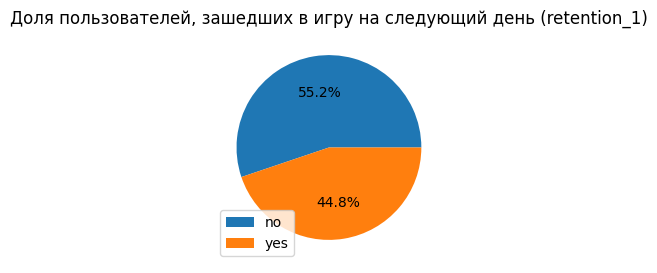

In [14]:
plt.figure(figsize=(3,3))
plt.pie(pie, autopct='%1.1f%%')
plt.title('Доля пользователей, зашедших в игру на следующий день (retention_1)')
plt.legend(pie.index)

plt.show()

In [15]:
pie = data['retention_7'][data['version'] == 'gate_30'].value_counts()
pie.index = ['no', 'yes']

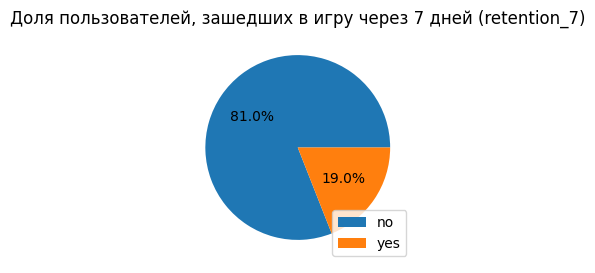

In [16]:
plt.figure(figsize=(3,3))
plt.pie(pie, autopct='%1.1f%%')
plt.title('Доля пользователей, зашедших в игру через 7 дней (retention_7)')
plt.legend(pie.index)

plt.show()

### Тест

In [17]:
print(f"{data[data['version'] == 'gate_40'].describe()}")
print(f"Сумма retention_1 для тестовой группы = {data['retention_1'][data['version'] == 'gate_40'].sum()}")
print(f"Сумма retention_7 для тестовой группы {data['retention_7'][data['version'] == 'gate_40'].sum()}")

             userid  sum_gamerounds
count  4.548900e+04    45489.000000
mean   5.009073e+06       51.298776
std    2.885496e+06      103.294416
min    3.770000e+02        0.000000
25%    2.517171e+06        5.000000
50%    5.007329e+06       16.000000
75%    7.510762e+06       52.000000
max    9.999861e+06     2640.000000
Сумма retention_1 для тестовой группы = 20119
Сумма retention_7 для тестовой группы 8279


In [18]:
pie = data['retention_1'][data['version'] == 'gate_40'].value_counts()
pie.index = ['no', 'yes']

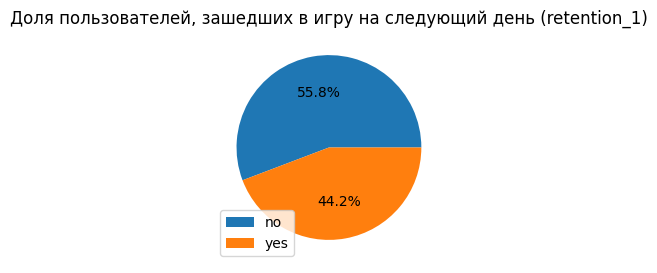

In [19]:
plt.figure(figsize=(3,3))
plt.pie(pie, autopct='%1.1f%%')
plt.title('Доля пользователей, зашедших в игру на следующий день (retention_1)')
plt.legend(pie.index)

plt.show()

In [20]:
pie = data['retention_7'][data['version'] == 'gate_40'].value_counts()
pie.index = ['no', 'yes']

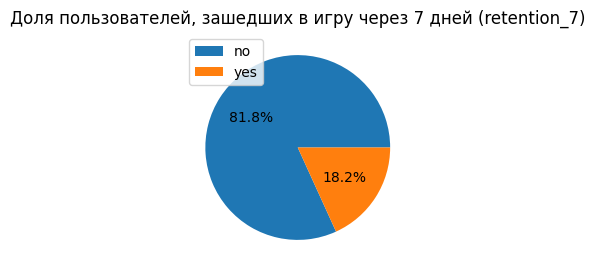

In [21]:
plt.figure(figsize=(3,3))
plt.pie(pie, autopct='%1.1f%%')
plt.title('Доля пользователей, зашедших в игру через 7 дней (retention_7)')
plt.legend(pie.index)

plt.show()

# Проверка данных на нормальность

In [22]:
import plotly.express as px
from scipy.stats import kstest, shapiro

Проверяем только метрику sum_gamerounds, так как остальные метрики пропорциональные (конверсии), и будем использовать непараметрические критерии.

### Графический метод

In [ ]:
import plotly.express as px

In [23]:
control_games = np.array(data['sum_gamerounds'][data['version'] == 'gate_30'])
test_games = np.array(data['sum_gamerounds'][data['version'] == 'gate_40'])

#### Гистограмма

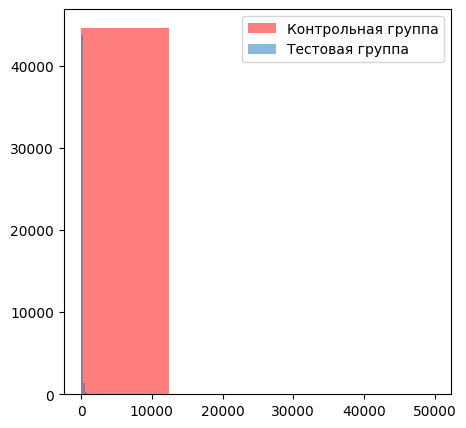

In [39]:
plt.figure(figsize=(5,5))
plt.hist(control_games, bins=4, color='r', alpha = 0.5, label='Контрольная группа')
plt.hist(test_games, bins=10, alpha = 0.5, label='Тестовая группа')
plt.legend()

plt.show()

#### QQ-график

In [48]:
import statsmodels.api as sm

<Figure size 100x100 with 0 Axes>

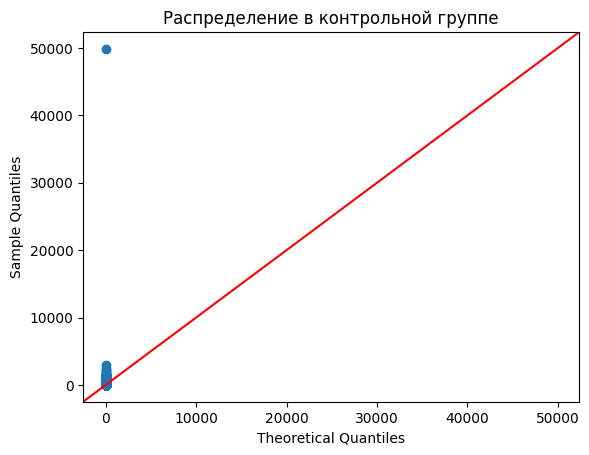

<Figure size 300x300 with 0 Axes>

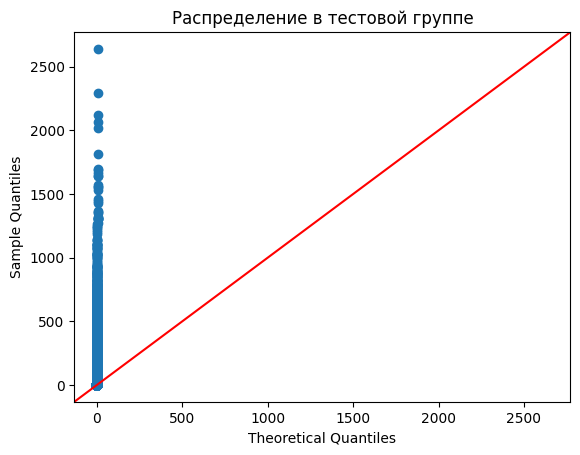

In [49]:
plt.figure(figsize=(1,1))
sm.qqplot(control_games, line='45')
plt.title('Распределение в контрольной группе')

plt.show()

plt.figure(figsize=(3,3))
sm.qqplot(test_games, line='45')
plt.title('Распределение в тестовой группе')

plt.show()


### Статистический метод

In [65]:
alpha = 0.05

#### Тест Шапиро-Уилка

Не очень предпочтителен, так как выборка более 5000 элементов.

##### Контрольная группа

In [70]:
sh_stat, sh_pvalue = shapiro(control_games)

print(f'Статистика = {sh_stat}\nP-value = {sh_pvalue}')
if sh_pvalue > alpha:
    print('Распределение нормальное')
else:
    print('Распределение отличное от нормального')

Статистика = 0.08805108070373535
P-value = 0.0
Распределение отличное от нормального


##### Тестовая группа

In [71]:
sh_stat, sh_pvalue = shapiro(test_games)

print(f'Статистика = {sh_stat}\nP-value = {sh_pvalue}')
if sh_pvalue > alpha:
    print('Распределение нормальное')
else:
    print('Распределение отличное от нормального')

Статистика = 0.48256635665893555
P-value = 0.0
Распределение отличное от нормального


#### Тест Колмагорова-Смирнова

##### Контрольная группа

In [73]:
ks_stat, ks_pvalue = kstest(control_games, cdf='norm')

print(f'Статистика = {ks_stat}\nP-value = {ks_pvalue}')
if ks_pvalue > alpha:
    print('Распределение нормальное')
else:
    print('Распределение отличное от нормального')

Статистика = 0.8724176532867202
P-value = 0.0
Распределение отличное от нормального


##### Тестовая группа

In [74]:
ks_stat, ks_pvalue = kstest(test_games, cdf='norm')

print(f'Статистика = {ks_stat}\nP-value = {ks_pvalue}')
if ks_pvalue > alpha:
    print('Распределение нормальное')
else:
    print('Распределение отличное от нормального')

Статистика = 0.8707186187388001
P-value = 0.0
Распределение отличное от нормального


# Анализ метрик

### sum_gamerounds

1. Количественные данные
2. Распределение, отличное от нормального